## Preprocessing

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, power_transform
import pandas as pd
import tensorflow as tf
# Import the kerastuner library
import keras_tuner as kt
import random
import numpy as np

np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

#  Import and read the charity_data.csv.
import pandas as pd 

application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_type_count = application_df['APPLICATION_TYPE'].value_counts()
application_type_count

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_count = 50
application_types_to_replace = application_type_count.loc[application_type_count < cutoff_count].index.to_list()


# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
Other       54
Name: count, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_type_counts = application_df['CLASSIFICATION'].value_counts()
classification_type_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_type_counts.loc[classification_type_counts > 5]

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
Name: count, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff_classification = 10
classifications_to_replace = classification_type_counts.loc[
    classification_type_counts <= cutoff_classification].index.to_list()

# classifications_to_replace

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls, "Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
Other      118
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
Name: count, dtype: int64

In [10]:
# value counts of status column
application_df['STATUS'].value_counts()

STATUS
1    34294
0        5
Name: count, dtype: int64

In [11]:
# drop the 'STATUS' column

application_df.drop('STATUS', axis=1, inplace=True)

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

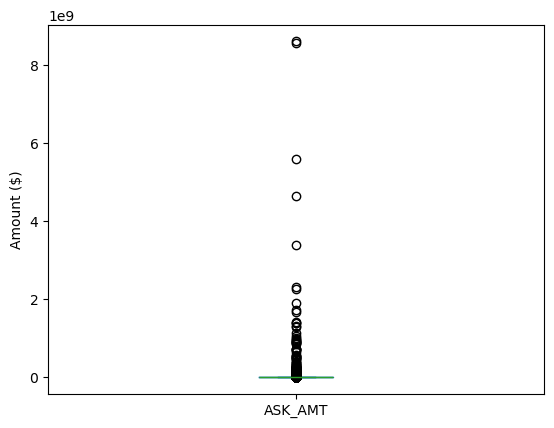

In [12]:
# investigate the distribution of the 'ASK_AMT' column
# X_train['ASK_AMT'].plot.hist(bins=100, xlabel='Ask Amount')
application_df['ASK_AMT'].plot.box(ylabel='Amount ($)')
application_df['ASK_AMT'].describe()

In [14]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_with_dummies = pd.get_dummies(application_df, columns=['APPLICATION_TYPE', 
                                        'AFFILIATION', 
                                        'CLASSIFICATION', 
                                        'USE_CASE', 
                                        'ORGANIZATION', 
                                        'INCOME_AMT', 
                                        'SPECIAL_CONSIDERATIONS',
                                        ], dtype=int)

In [15]:
# Split our preprocessed data into our features and target arrays
y = application_df_with_dummies['IS_SUCCESSFUL']     # the binary target array

X = application_df_with_dummies.drop(columns='IS_SUCCESSFUL', axis=1)    # input features DataFrame

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
# create transformation function to deal with the large right skewness of 'ASK_AMT' column

def transform_column(df, column_name):
    # reshape column into 2D array
    col_array = np.reshape(df[column_name].values, (-1, 1))

    # use the yeo-johnson transformation
    col_transformed = power_transform(col_array, method='yeo-johnson')

    # add transformed column to dataframe
    new_column_name = f"{column_name}_transformed"
    df[new_column_name] = col_transformed
    df.drop(column_name, axis=1, inplace=True)
    return df

X_train = transform_column(X_train, 'ASK_AMT')
X_test = transform_column(X_test, 'ASK_AMT')


In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [18]:
n_input_features = X_train_scaled.shape[1]  # the number of columns (features) in the X_train_scaled df
n_nodes_layer_1 = int(2 * n_input_features ) # scale the number of features in the first layer by number of features and a scalar
n_nodes_layer_2 = int(3 * n_input_features) # scale the number of features in the first layer by number of features and a scalar
activation_func_init = 'relu'



In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_final = tf.keras.models.Sequential(name='optimised_model_v1')



# First hidden layer
nn_final.add(tf.keras.layers.Dense(units = n_nodes_layer_1, 
                             input_dim = n_input_features,
                             activation = activation_func_init,
                             name = 'Layer_1'   
                            )
        )


# Second hidden layer
nn_final.add(tf.keras.layers.Dense(units = n_nodes_layer_2, 
                             activation = activation_func_init,
                             name='Layer_2'
                             )
        )

# Output layer
nn_final.add(tf.keras.layers.Dense(units = 1, 
                             activation='sigmoid',
                             name = 'Output',
                             )
        )

# Check the structure of the model
nn_final.summary()

Model: "optimised_model_v1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 132)               8844      
                                                                 
 Layer_2 (Dense)             (None, 198)               26334     
                                                                 
 Output (Dense)              (None, 1)                 199       
                                                                 
Total params: 35377 (138.19 KB)
Trainable params: 35377 (138.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# compile the model
nn_final.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# create checkpoint callback for every 5 batches
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("./checkpoints/optimise_1/",
                                                           save_weights_only = True,
                                                           save_freq = 5
                                                           )

# Train the model
fit_model = nn_final.fit(X_train_scaled, 
                        y_train, 
                        epochs=30,
                        callbacks = model_checkpoint,
                        )

Epoch 1/30
804/804 [==============================] - 1s 820us/step - loss: 0.5698 - accuracy: 0.7198
Epoch 2/30
804/804 [==============================] - 1s 810us/step - loss: 0.5523 - accuracy: 0.7301
Epoch 3/30
804/804 [==============================] - 1s 795us/step - loss: 0.5486 - accuracy: 0.7301
Epoch 4/30
804/804 [==============================] - 1s 797us/step - loss: 0.5463 - accuracy: 0.7328
Epoch 5/30
804/804 [==============================] - 1s 806us/step - loss: 0.5448 - accuracy: 0.7337
Epoch 6/30
804/804 [==============================] - 1s 870us/step - loss: 0.5435 - accuracy: 0.7348
Epoch 7/30
804/804 [==============================] - 1s 855us/step - loss: 0.5431 - accuracy: 0.7341
Epoch 8/30
804/804 [==============================] - 1s 812us/step - loss: 0.5418 - accuracy: 0.7350
Epoch 9/30
804/804 [==============================] - 1s 837us/step - loss: 0.5416 - accuracy: 0.7362
Epoch 10/30
804/804 [==============================] - 1s 807us/step - loss: 0.540

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_final.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5524 - accuracy: 0.7328 - 184ms/epoch - 685us/step
Loss: 0.5523973107337952, Accuracy: 0.7328279614448547


## Hyperparameter Tuning

In [22]:
# Create a method that creates a new Sequential model with hyperparameter options
min_num_features = round(n_input_features, -1) * 2
max_num_features =  round(n_input_features, -1) * 5
node_step = 10

def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # add dropout layer for stability in model
    nn_model.add(tf.keras.layers.Dropout(0.3, input_dim=n_input_features))

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation', ['relu', 'tanh',])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
                                                        min_value=min_num_features,
                                                        max_value=max_num_features,
                                                        step= node_step),
                                                    activation=activation,
                                                    # input_dim=n_input_features,
                                                    name='Layer_1'
                                                    )
                )
    


    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 4)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
                min_value=min_num_features,
                max_value=max_num_features,
                step = node_step),
            name = f"Layer_{i+2}",
            activation=activation))
    

    # Add final layer    
    nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid', name='Output'))

    # Compile the model
    nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

    return nn_model

In [23]:


tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=2)

# Run the kerastuner search for best initial hyperparameters after 20 epochs
tuner.search(X_train_scaled, y_train,
             epochs=30,
             validation_data = (X_test_scaled, y_test))

Reloading Tuner from ./untitled_project/tuner0.json


In [24]:
# print the hyperparameters of the 5 best models
top_hp = tuner.get_best_hyperparameters(num_trials=5)
for hps in top_hp:
    print(hps.values)


{'activation': 'tanh', 'first_units': 210, 'num_layers': 3, 'units_0': 280, 'units_1': 230, 'units_2': 180, 'units_3': 350, 'tuner/epochs': 50, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
{'activation': 'tanh', 'first_units': 350, 'num_layers': 4, 'units_0': 220, 'units_1': 240, 'units_2': 340, 'units_3': 280, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0137'}
{'activation': 'tanh', 'first_units': 270, 'num_layers': 1, 'units_0': 290, 'units_1': 160, 'units_2': 300, 'units_3': 170, 'tuner/epochs': 6, 'tuner/initial_epoch': 0, 'tuner/bracket': 2, 'tuner/round': 0}
{'activation': 'relu', 'first_units': 160, 'num_layers': 2, 'units_0': 200, 'units_1': 230, 'units_2': 150, 'units_3': 230, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0070'}
{'activation': 'relu', 'first_units': 250, 'num_layers': 4, 'units_0': 220, 'units_1': 240, 'units_2': 180, 'units_

In [25]:
# print out the loss and accuracy for each of the 5 best models

for i, model in enumerate(tuner.get_best_models(num_models=5)):
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"model {i+1} Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5512 - accuracy: 0.7332 - 294ms/epoch - 1ms/step
model 1 Loss: 0.5511918663978577, Accuracy: 0.7331778407096863
268/268 - 0s - loss: 0.5524 - accuracy: 0.7328 - 325ms/epoch - 1ms/step
model 2 Loss: 0.5524091124534607, Accuracy: 0.7328279614448547
268/268 - 0s - loss: 0.5550 - accuracy: 0.7328 - 219ms/epoch - 818us/step
model 3 Loss: 0.5549689531326294, Accuracy: 0.7328279614448547
268/268 - 0s - loss: 0.5488 - accuracy: 0.7328 - 208ms/epoch - 777us/step
model 4 Loss: 0.5487939119338989, Accuracy: 0.7328279614448547
268/268 - 0s - loss: 0.5510 - accuracy: 0.7328 - 256ms/epoch - 956us/step
model 5 Loss: 0.5509549379348755, Accuracy: 0.7328279614448547


In [26]:
# The best model from the tuner

best_model = tuner.get_best_models(num_models=1)[0]
print(best_model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 66)                0         
                                                                 
 Layer_1 (Dense)             (None, 210)               14070     
                                                                 
 Layer_2 (Dense)             (None, 280)               59080     
                                                                 
 Layer_3 (Dense)             (None, 230)               64630     
                                                                 
 Layer_4 (Dense)             (None, 180)               41580     
                                                                 
 Output (Dense)              (None, 1)                 181       
                                                                 
Total params: 179541 (701.33 KB)
Trainable params: 17954

In [27]:
# save the best hyperparemeters
best_hp = tuner.get_best_hyperparameters(1)[0].values
best_hp

{'activation': 'tanh',
 'first_units': 210,
 'num_layers': 3,
 'units_0': 280,
 'units_1': 230,
 'units_2': 180,
 'units_3': 350,
 'tuner/epochs': 50,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [28]:
# Compile the model and save it
best_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# create checkpoint callback for every 5 batches
final_model_checkpoint = tf.keras.callbacks.ModelCheckpoint("./checkpoints/final_model/",
                                                           save_weights_only = True,
                                                           save_freq = 5
                                                           )


# Train the best model
fit_final_model = best_model.fit(X_train_scaled, y_train,epochs=50, 
                               callbacks=final_model_checkpoint
                               )

Epoch 1/50
804/804 [==============================] - 4s 5ms/step - loss: 0.5690 - accuracy: 0.7132
Epoch 2/50
804/804 [==============================] - 4s 5ms/step - loss: 0.5685 - accuracy: 0.7138
Epoch 3/50
804/804 [==============================] - 4s 5ms/step - loss: 0.5688 - accuracy: 0.7132
Epoch 4/50
804/804 [==============================] - 4s 4ms/step - loss: 0.5677 - accuracy: 0.7150
Epoch 5/50
804/804 [==============================] - 4s 5ms/step - loss: 0.5701 - accuracy: 0.7122
Epoch 6/50
804/804 [==============================] - 4s 5ms/step - loss: 0.5687 - accuracy: 0.7153
Epoch 7/50
804/804 [==============================] - 4s 5ms/step - loss: 0.5685 - accuracy: 0.7155
Epoch 8/50
804/804 [==============================] - 4s 5ms/step - loss: 0.5676 - accuracy: 0.7170
Epoch 9/50
804/804 [==============================] - 4s 5ms/step - loss: 0.5669 - accuracy: 0.7158
Epoch 10/50
804/804 [==============================] - 4s 5ms/step - loss: 0.5668 - accuracy: 0.7169

In [29]:
# save the model to HDF5 as per homework instructions
# this is considered a legacy option now as per warning message
best_model.save("./models/AlphabetSoupCharity_Optimisation.h5")    

/Users/benwruck/miniconda3/envs/py310/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
# this is the recommended method for saving as per keras documentation which is a zipped archive which contains the h5 too!
# https://keras.io/guides/serialization_and_saving/
best_model.save("./models/AlphabetSoupCharity_Optimisation.keras")